In [1]:
from sqlalchemy import create_engine
from dburl import db_url
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#connect to db tables
engine = create_engine(db_url)
connection = engine.connect()

#get data from tables
SalaryData = pd.read_sql("Select * from salaries", connection)
TitleData = pd.read_sql("Select * from titles", connection)

SalaryData.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [2]:
TitleData.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [3]:
#merged ata
MergedDF = pd.merge(SalaryData, TitleData, on="emp_no", how ="inner")
#drop extranneous info
MergedDF = MergedDF.drop(columns= ["from_date_x", "to_date_x", "from_date_y", "to_date_y", "emp_no"])

MergedDF

,salary,title
0,60117,Senior Engineer
1,65828,Staff
2,40006,Senior Engineer
3,40054,Engineer
4,40054,Senior Engineer
...,...,...
443303,49597,Engineer
443304,49597,Senior Engineer
443305,40000,Senior Staff
443306,40000,Staff


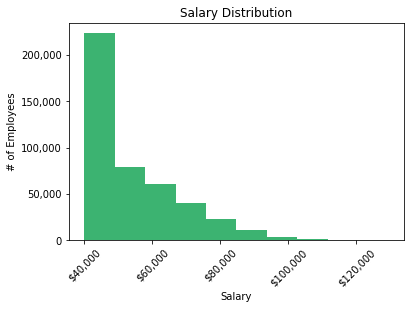

In [4]:
#PLOT HISTOGRAM OF SALARY DISTRIBUTION

fig, ax = plt.subplots()
ax.hist(MergedDF['salary'],color='mediumseagreen')

ax.set_title("Salary Distribution")
ax.set_xlabel("Salary")
ax.set_ylabel("# of Employees")

#format salary labels
xformat = '${x:,.0f}'
xtick = ticker.StrMethodFormatter(xformat)
ax.xaxis.set_major_formatter(xtick)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

#format # of emp labels
yformat = '{x:,.0f}'
ytick = ticker.StrMethodFormatter(yformat)
ax.yaxis.set_major_formatter(ytick)

plt.show()

In [5]:
#determine average salaries
AvgSalaryByTitle = MergedDF.groupby("title")["salary"].mean()

#convert to df for more customized plotting
AvgSalaryByTitle = pd.DataFrame(AvgSalaryByTitle)
AvgSalaryByTitle = AvgSalaryByTitle.reset_index()
AvgSalaryByTitle

,title,salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


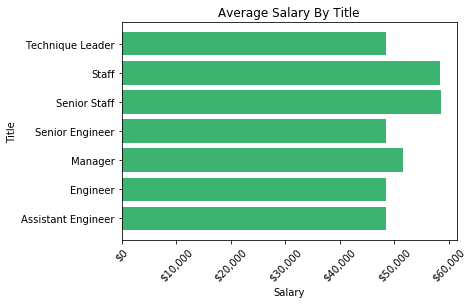

In [6]:
#PLOT BAR CHART OF AVERAGE SALARIES

fig, ax = plt.subplots()
ax.barh(AvgSalaryByTitle['title'],AvgSalaryByTitle['salary'], align = 'center', color='mediumseagreen')

#set lables
ax.set_title("Average Salary By Title")
ax.set_xlabel("Salary")
ax.set_ylabel("Title")

#format money labels
xformat = '${x:,.0f}'
xtick = ticker.StrMethodFormatter(xformat)
ax.xaxis.set_major_formatter(xtick) 

#rotate money labels for readability
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)


plt.show()